# Finance Data Project 

In this data project we will be performing exploratory data analysis of stock prices.
____
We will focus on bank stocks and see how they progressed throughout the [financial crisis] in 2016.(https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) 

In this section we will try to use pandas to directly read data from Google finance.

I have installed pandas-datareader for this project using 
"pip install pandas-reader". Pandas datareader allows us to read stock information directly from the internet.

In [51]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb
from pandas.api.types import is_list_like
import numpy as np
import datetime
%matplotlib inline

In [52]:
import pickle
df = pd.read_pickle('all_banks')


In [53]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [54]:
df.columns

MultiIndex(levels=[['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['Open', 'High', 'Low', 'Close', 'Volume']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Bank Ticker', 'Stock Info'])

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** I have obtained the stock price from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Reference (http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Tried using google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)
    
**NOTE: google finance did not work as expected. So googled and found an alternative way using 'quandl' instead. **


In [55]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [56]:
#BAC = BAC = data.DataReader('BAC', 'google', start, end)
# Google finance did not work. So using quandl instead.
BAC = data.DataReader('BAC', 'quandl', start, end)


In [57]:
BAC.head()

Open   High    Low  Close      Volume  ExDividend  SplitRatio  \
Date                                                                         
2015-12-31  17.01  17.07  16.83  16.83  47106760.0         0.0         1.0   
2015-12-30  17.20  17.24  17.04  17.05  35035518.0         0.0         1.0   
2015-12-29  17.25  17.35  17.16  17.28  45628449.0         0.0         1.0   
2015-12-28  17.22  17.23  16.98  17.13  41759993.0         0.0         1.0   
2015-12-24  17.32  17.38  17.22  17.27  29373415.0         0.0         1.0   

              AdjOpen    AdjHigh     AdjLow   AdjClose   AdjVolume  
Date                                                                
2015-12-31  16.564256  16.622684  16.388973  16.388973  47106760.0  
2015-12-30  16.749277  16.788229  16.593470  16.603208  35035518.0  
2015-12-29  16.797967  16.895347  16.710326  16.827181  45628449.0  
2015-12-28  16.768753  16.778491  16.535042  16.681112  41759993.0  
2015-12-24  16.866133  16.924561  16.768753  16.817443  29373415.0

** Observation : There are a lot of extra columns compared to google finance in quandl. So I dropped unnecessary columns **

In [58]:
BAC.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend', 'SplitRatio',
       'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'],
      dtype='object')

In [59]:
BAC = BAC.drop(['ExDividend', 'SplitRatio','AdjOpen', 
                'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'], axis = 1)
BAC.head()

Open   High    Low  Close      Volume
Date                                              
2015-12-31  17.01  17.07  16.83  16.83  47106760.0
2015-12-30  17.20  17.24  17.04  17.05  35035518.0
2015-12-29  17.25  17.35  17.16  17.28  45628449.0
2015-12-28  17.22  17.23  16.98  17.13  41759993.0
2015-12-24  17.32  17.38  17.22  17.27  29373415.0

In [60]:
#Sort the date index in ascending order
BAC = BAC.sort_index(ascending = True)
BAC.head()

Open   High    Low  Close      Volume
Date                                              
2006-01-03  46.92  47.18  46.15  47.08  16296700.0
2006-01-04  47.00  47.24  46.45  46.58  17757900.0
2006-01-05  46.58  46.83  46.32  46.64  14970700.0
2006-01-06  46.80  46.91  46.35  46.57  12599800.0
2006-01-09  46.72  46.97  46.36  46.60  15619400.0

In [61]:
C = data.DataReader('C', 'quandl', start, end)
C.head()

Open   High    Low  Close      Volume  ExDividend  SplitRatio  \
Date                                                                         
2015-12-31  52.07  52.39  51.75  51.75  11274831.0         0.0         1.0   
2015-12-30  52.84  52.94  52.25  52.30   8763137.0         0.0         1.0   
2015-12-29  52.76  53.22  52.74  52.98  10153534.0         0.0         1.0   
2015-12-28  52.57  52.57  51.96  52.38   8760444.0         0.0         1.0   
2015-12-24  52.48  52.97  52.45  52.71   4671254.0         0.0         1.0   

              AdjOpen    AdjHigh     AdjLow   AdjClose   AdjVolume  
Date                                                                
2015-12-31  50.846027  51.158505  50.533549  50.533549  11274831.0  
2015-12-30  51.597927  51.695577  51.021796  51.070621   8763137.0  
2015-12-29  51.519808  51.968995  51.500278  51.734637  10153534.0  
2015-12-28  51.334274  51.334274  50.738613  51.148740   8760444.0  
2015-12-24  51.246390  51.724872  51.217095  51.470983   4671254.0

In [62]:
C.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend', 'SplitRatio',
       'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'],
      dtype='object')

In [63]:
C = C.drop(['ExDividend', 'SplitRatio','AdjOpen', 
                'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'], axis = 1)
C.head()

Open   High    Low  Close      Volume
Date                                              
2015-12-31  52.07  52.39  51.75  51.75  11274831.0
2015-12-30  52.84  52.94  52.25  52.30   8763137.0
2015-12-29  52.76  53.22  52.74  52.98  10153534.0
2015-12-28  52.57  52.57  51.96  52.38   8760444.0
2015-12-24  52.48  52.97  52.45  52.71   4671254.0

In [64]:
#Sort the date index in ascending order
C = C.sort_index(ascending = True)
C.head()

Open   High    Low  Close      Volume
Date                                              
2006-01-03  49.00  49.38  48.11  49.29  15376000.0
2006-01-04  48.86  49.10  48.35  48.38  18709000.0
2006-01-05  48.44  48.78  48.40  48.62  11431000.0
2006-01-06  48.88  48.90  48.20  48.62  13702000.0
2006-01-09  48.60  48.74  48.30  48.39  16807000.0

In [65]:
GS = data.DataReader('GS', 'quandl', start, end)
GS.head()

Open      High       Low   Close     Volume  ExDividend  \
Date                                                                    
2015-12-31  181.16  182.8850  180.0300  180.23  1773531.0         0.0   
2015-12-30  183.28  183.5300  181.8400  182.01  1514347.0         0.0   
2015-12-29  182.82  184.1800  182.5003  183.53  1848859.0         0.0   
2015-12-28  181.77  181.9325  179.8400  181.62  1723330.0         0.0   
2015-12-24  182.27  183.1700  182.0200  182.47  1107633.0         0.0   

            SplitRatio     AdjOpen     AdjHigh      AdjLow    AdjClose  \
Date                                                                     
2015-12-31         1.0  176.731715  178.414549  175.629336  175.824448   
2015-12-30         1.0  178.799893  179.043782  177.395093  177.560937   
2015-12-29         1.0  178.351137  179.677893  178.039252  179.043782   
2015-12-28         1.0  177.326804  177.485332  175.443981  177.180470   
2015-12-24         1.0  177.814582  178.692582  177.570693  178.009693   

            AdjVolume  
Date                   
2015-12-31  1773531.0  
2015-12-30  1514347.0  
2015-12-29  1848859.0  
2015-12-28  1723330.0  
2015-12-24  1107633.0

In [66]:
GS.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend', 'SplitRatio',
       'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'],
      dtype='object')

In [67]:
GS = GS.drop(['ExDividend', 'SplitRatio','AdjOpen', 
                'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'], axis = 1)
GS.head()

Open      High       Low   Close     Volume
Date                                                     
2015-12-31  181.16  182.8850  180.0300  180.23  1773531.0
2015-12-30  183.28  183.5300  181.8400  182.01  1514347.0
2015-12-29  182.82  184.1800  182.5003  183.53  1848859.0
2015-12-28  181.77  181.9325  179.8400  181.62  1723330.0
2015-12-24  182.27  183.1700  182.0200  182.47  1107633.0

In [68]:
#Sort the date index in ascending order
GS = GS.sort_index(ascending = True)
GS.head()

Open    High     Low   Close     Volume
Date                                                 
2006-01-03  126.70  129.44  124.23  128.87  6188700.0
2006-01-04  127.35  128.91  126.38  127.09  4861600.0
2006-01-05  126.00  127.32  125.61  127.04  3717400.0
2006-01-06  127.29  129.25  127.29  128.84  4319600.0
2006-01-09  128.50  130.62  128.00  130.39  4723500.0

In [69]:
JPM = data.DataReader('JPM', 'quandl', start, end)
JPM.head()

Open     High    Low  Close      Volume  ExDividend  SplitRatio  \
Date                                                                           
2015-12-31  66.19  66.7801  66.00  66.03  14654049.0         0.0         1.0   
2015-12-30  67.04  67.0500  66.45  66.59   7189850.0         0.0         1.0   
2015-12-29  66.84  67.3000  66.74  67.07   9820660.0         0.0         1.0   
2015-12-28  66.29  66.4500  65.71  66.38   6610446.0         0.0         1.0   
2015-12-24  66.62  66.8900  66.32  66.60   4468242.0         0.0         1.0   

              AdjOpen    AdjHigh     AdjLow   AdjClose   AdjVolume  
Date                                                                
2015-12-31  62.859378  63.419785  62.678939  62.707429  14654049.0  
2015-12-30  63.666607  63.676104  63.106295  63.239250   7189850.0  
2015-12-29  63.476671  63.913524  63.381702  63.695097   9820660.0  
2015-12-28  62.954346  63.106295  62.403531  63.039817   6610446.0  
2015-12-24  63.267741  63.524155  62.982836  63.248747   4468242.0

In [70]:
JPM = JPM.drop(['ExDividend', 'SplitRatio','AdjOpen', 
                'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'], axis = 1)
JPM.head()

Open     High    Low  Close      Volume
Date                                                
2015-12-31  66.19  66.7801  66.00  66.03  14654049.0
2015-12-30  67.04  67.0500  66.45  66.59   7189850.0
2015-12-29  66.84  67.3000  66.74  67.07   9820660.0
2015-12-28  66.29  66.4500  65.71  66.38   6610446.0
2015-12-24  66.62  66.8900  66.32  66.60   4468242.0

In [71]:
#Sort the date index in ascending order
JPM = JPM.sort_index(ascending = True)
JPM.head()

Open   High    Low  Close      Volume
Date                                              
2006-01-03  39.83  40.36  39.30  40.19  12838600.0
2006-01-04  39.78  40.14  39.42  39.62  13491500.0
2006-01-05  39.61  39.81  39.50  39.74   8109400.0
2006-01-06  39.92  40.24  39.55  40.02   7966900.0
2006-01-09  39.88  40.72  39.88  40.67  16575200.0

In [72]:
MS = data.DataReader('MS', 'quandl', start, end)
MS.head()

Open     High     Low  Close     Volume  ExDividend  SplitRatio  \
Date                                                                           
2015-12-31  31.91  32.3000  31.770  31.81  8149307.0         0.0         1.0   
2015-12-30  32.50  32.6450  32.200  32.23  5057162.0         0.0         1.0   
2015-12-29  32.44  32.7016  32.325  32.55  6388244.0         0.0         1.0   
2015-12-28  32.36  32.3600  31.950  32.17  5420280.0         0.0         1.0   
2015-12-24  32.57  32.7100  32.440  32.48  2798163.0         0.0         1.0   

              AdjOpen    AdjHigh     AdjLow   AdjClose  AdjVolume  
Date                                                               
2015-12-31  30.552137  30.925541  30.418094  30.456392  8149307.0  
2015-12-30  31.117030  31.255860  30.829796  30.858520  5057162.0  
2015-12-29  31.059583  31.310052  30.949477  31.164903  6388244.0  
2015-12-28  30.982988  30.982988  30.590434  30.801073  5420280.0  
2015-12-24  31.184052  31.318094  31.059583  31.097881  2798163.0

In [73]:
MS = MS.drop(['ExDividend', 'SplitRatio','AdjOpen', 
                'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'], axis = 1)
MS.head()

Open     High     Low  Close     Volume
Date                                                
2015-12-31  31.91  32.3000  31.770  31.81  8149307.0
2015-12-30  32.50  32.6450  32.200  32.23  5057162.0
2015-12-29  32.44  32.7016  32.325  32.55  6388244.0
2015-12-28  32.36  32.3600  31.950  32.17  5420280.0
2015-12-24  32.57  32.7100  32.440  32.48  2798163.0

In [74]:
#Sort the date index in ascending order
MS = MS.sort_index(ascending = True)
MS.head()

Open   High      Low  Close     Volume
Date                                               
2006-01-03  57.17  58.49  56.7400  58.31  5377000.0
2006-01-04  58.70  59.28  58.3500  58.35  7977800.0
2006-01-05  58.55  58.59  58.0200  58.51  5778000.0
2006-01-06  58.77  58.85  58.0500  58.57  6889800.0
2006-01-09  58.63  59.29  58.6244  59.19  4144500.0

In [75]:
WFC = data.DataReader('WFC', 'quandl', start, end)
WFC.head()

Open     High     Low  Close      Volume  ExDividend  SplitRatio  \
Date                                                                            
2015-12-31  54.51  54.9499  54.220  54.36  10929420.0         0.0         1.0   
2015-12-30  55.27  55.3100  54.794  54.89   8016893.0         0.0         1.0   
2015-12-29  55.11  55.3500  54.990  55.29   7894876.0         0.0         1.0   
2015-12-28  54.55  54.7800  54.170  54.68   8288759.0         0.0         1.0   
2015-12-24  54.97  55.0900  54.710  54.82   4999417.0         0.0         1.0   

              AdjOpen    AdjHigh     AdjLow   AdjClose   AdjVolume  
Date                                                                
2015-12-31  51.350518  51.764921  51.077327  51.209212  10929420.0  
2015-12-30  52.066467  52.104149  51.618057  51.708493   8016893.0  
2015-12-29  51.915741  52.141830  51.802696  52.085308   7894876.0  
2015-12-28  51.388199  51.604868  51.030225  51.510664   8288759.0  
2015-12-24  51.783856  51.896900  51.538926  51.642550   4999417.0

In [76]:
WFC = WFC.drop(['ExDividend', 'SplitRatio','AdjOpen', 
                'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'], axis = 1)
WFC.head()

Open     High     Low  Close      Volume
Date                                                 
2015-12-31  54.51  54.9499  54.220  54.36  10929420.0
2015-12-30  55.27  55.3100  54.794  54.89   8016893.0
2015-12-29  55.11  55.3500  54.990  55.29   7894876.0
2015-12-28  54.55  54.7800  54.170  54.68   8288759.0
2015-12-24  54.97  55.0900  54.710  54.82   4999417.0

In [77]:
#Sort the date index in ascending order
WFC = WFC.sort_index(ascending = True)
WFC.head()

Open   High    Low  Close     Volume
Date                                             
2006-01-03  63.20  63.95  62.39  63.80  5508200.0
2006-01-04  63.60  63.64  62.73  63.06  5435000.0
2006-01-05  63.00  63.11  62.62  62.99  5079000.0
2006-01-06  63.16  63.55  62.77  63.36  4201900.0
2006-01-09  63.35  63.65  63.11  63.35  2809800.0

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [78]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also set axis = 1, to concatenate the columns.**

In [79]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], 
                        axis = 1, keys = tickers )
bank_stocks.head()

BAC                                       C                \
             Open   High    Low  Close      Volume   Open   High    Low   
Date                                                                      
2006-01-03  46.92  47.18  46.15  47.08  16296700.0  49.00  49.38  48.11   
2006-01-04  47.00  47.24  46.45  46.58  17757900.0  48.86  49.10  48.35   
2006-01-05  46.58  46.83  46.32  46.64  14970700.0  48.44  48.78  48.40   
2006-01-06  46.80  46.91  46.35  46.57  12599800.0  48.88  48.90  48.20   
2006-01-09  46.72  46.97  46.36  46.60  15619400.0  48.60  48.74  48.30   

                                 ...         MS                         \
            Close      Volume    ...       Open   High      Low  Close   
Date                             ...                                     
2006-01-03  49.29  15376000.0    ...      57.17  58.49  56.7400  58.31   
2006-01-04  48.38  18709000.0    ...      58.70  59.28  58.3500  58.35   
2006-01-05  48.62  11431000.0    ...      58.55  58.59  58.0200  58.51   
2006-01-06  48.62  13702000.0    ...      58.77  58.85  58.0500  58.57   
2006-01-09  48.39  16807000.0    ...      58.63  59.29  58.6244  59.19   

                         WFC                                  
               Volume   Open   High    Low  Close     Volume  
Date                                                          
2006-01-03  5377000.0  63.20  63.95  62.39  63.80  5508200.0  
2006-01-04  7977800.0  63.60  63.64  62.73  63.06  5435000.0  
2006-01-05  5778000.0  63.00  63.11  62.62  62.99  5079000.0  
2006-01-06  6889800.0  63.16  63.55  62.77  63.36  4201900.0  
2006-01-09  4144500.0  63.35  63.65  63.11  63.35  2809800.0  

[5 rows x 30 columns]

** Set the column name levels.**

In [80]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [81]:
bank_stocks.head()

Bank Ticker    BAC                                       C                \
Stock Info    Open   High    Low  Close      Volume   Open   High    Low   
Date                                                                       
2006-01-03   46.92  47.18  46.15  47.08  16296700.0  49.00  49.38  48.11   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0  48.86  49.10  48.35   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0  48.44  48.78  48.40   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0  48.88  48.90  48.20   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0  48.60  48.74  48.30   

Bank Ticker                       ...         MS                         \
Stock Info   Close      Volume    ...       Open   High      Low  Close   
Date                              ...                                     
2006-01-03   49.29  15376000.0    ...      57.17  58.49  56.7400  58.31   
2006-01-04   48.38  18709000.0    ...      58.70  59.28  58.3500  58.35   
2006-01-05   48.62  11431000.0    ...      58.55  58.59  58.0200  58.51   
2006-01-06   48.62  13702000.0    ...      58.77  58.85  58.0500  58.57   
2006-01-09   48.39  16807000.0    ...      58.63  59.29  58.6244  59.19   

Bank Ticker               WFC                                  
Stock Info      Volume   Open   High    Low  Close     Volume  
Date                                                           
2006-01-03   5377000.0  63.20  63.95  62.39  63.80  5508200.0  
2006-01-04   7977800.0  63.60  63.64  62.73  63.06  5435000.0  
2006-01-05   5778000.0  63.00  63.11  62.62  62.99  5079000.0  
2006-01-06   6889800.0  63.16  63.55  62.77  63.36  4201900.0  
2006-01-09   4144500.0  63.35  63.65  63.11  63.35  2809800.0  

[5 rows x 30 columns]

## Exploratory Data Analysis

Reference:  Documentation on Multi-Level Indexing http://pandas.pydata.org/pandas-docs/stable/advanced.html 
and Using cross-section (.xs) 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html


** We want to find the max Close price for each bank's stock throughout the time period**

In [82]:
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [83]:
returns = pd.DataFrame()

** We will use pandas pct_change() method on the Close column to create a column representing this return value. For this, use a for loop that will create this returns column and for each Bank Stock Ticker and set it as a column in the returns DataFrame.**

In [84]:
for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()
    

In [85]:
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

** Create a pairplot using seaborn of the returns dataframe. Let us see which stock stands out. **

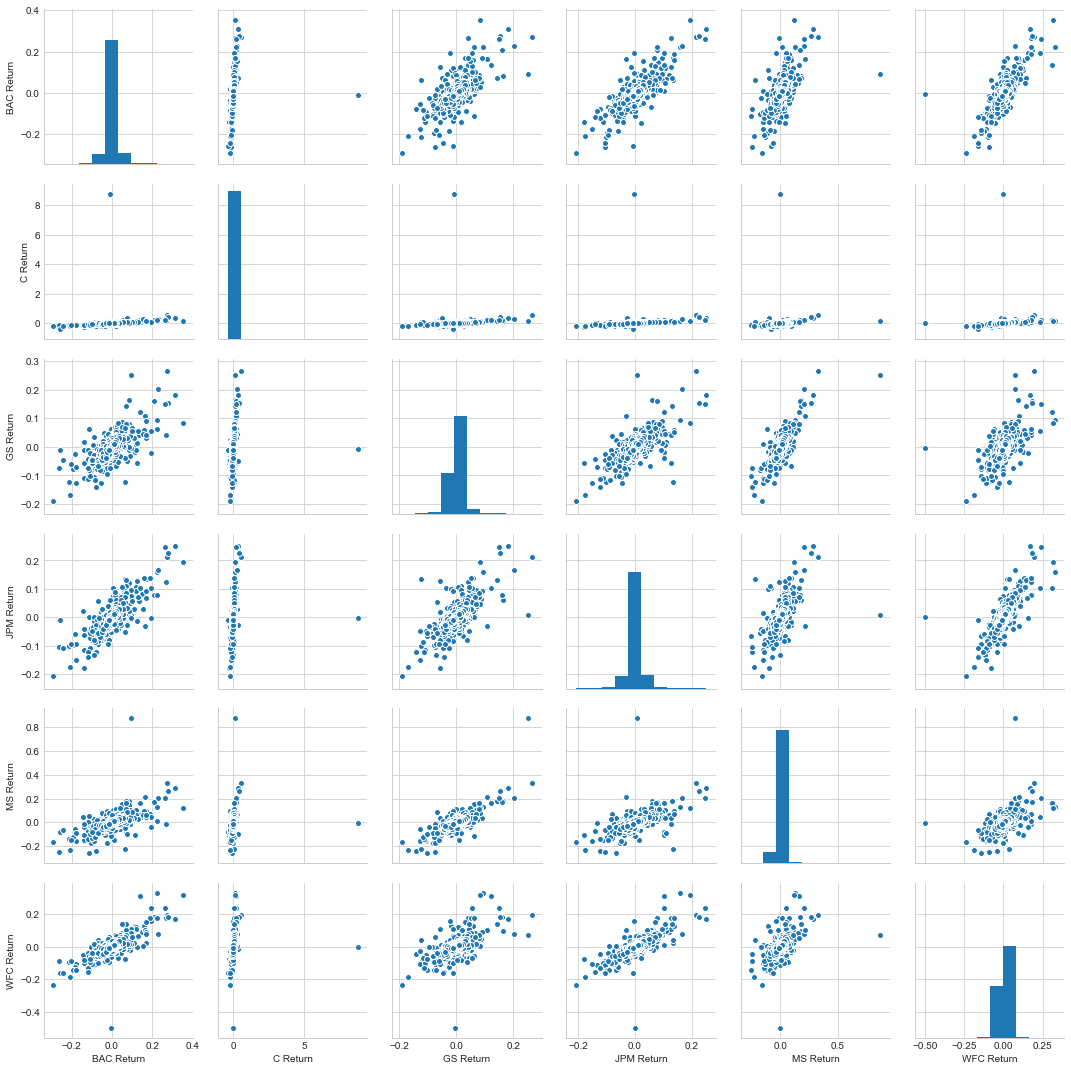

In [86]:
import seaborn as sns
sns.pairplot(returns[1:])


**Observation:  Citibank has a vertical line.**

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.**

In [87]:
#Get the head of the dataframe
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

In [88]:
#Get the min
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.502084
dtype: float64

In [89]:
#Get the worst single day loss
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

In [90]:
# Get the best single day gain
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Observation: We see that some largest drop and biggest gain were very close to one another. **

** To find out which stocks are the riskiest over the entire time period, take a look at the standard deviation of the returns. **

In [91]:
# Riskiest stock for  the entire period
returns.std()

BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037820
WFC Return    0.031838
dtype: float64

In [92]:
#Get stddev of returns
start_date = '2015-01-01'
end_date = '2016-01-01'
returns[start_date : end_date].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/Users/Jayashri/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



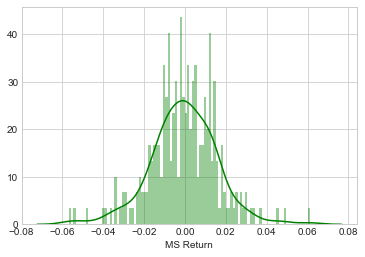

In [93]:
sns.set_style('whitegrid')
sns.distplot(returns[start_date : end_date]['MS Return'], bins = 100, 
            color = 'green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/Jayashri/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



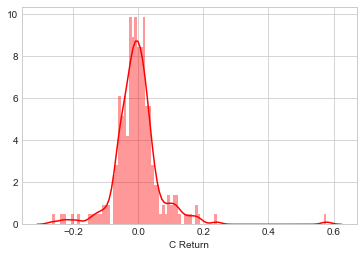

In [94]:
start_date = '2008-01-01'
end_date = '2009-01-01'
sns.distplot(returns[start_date : end_date]['C Return'], bins = 100, 
            color = 'red')


____
# More Visualization

### Imports

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. This can be done using a for loop, or [.xs]   
http://pandas.pydata.org/pandasdocs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.**

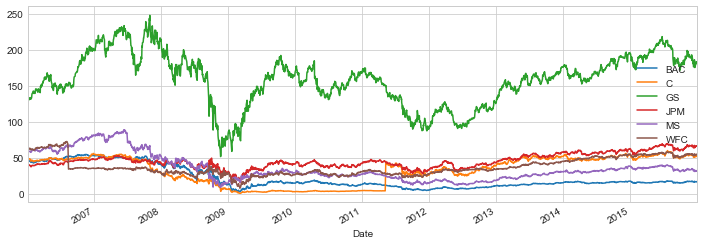

In [100]:
#Using for loop
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

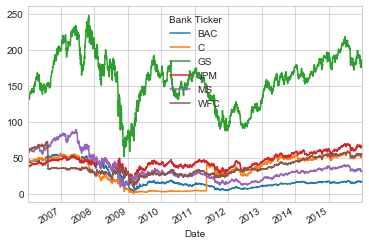

In [101]:
#Using cross-section .xs
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()

In [102]:
#Using plotly - use iplot instead of plot in
#the previous command
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

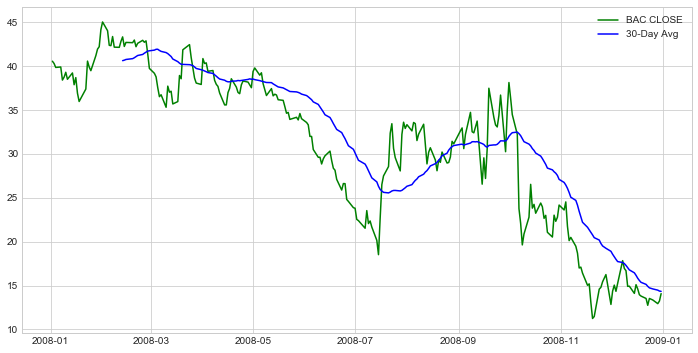

In [103]:
# Get 30 day moving average
start_date = '2008-01-01'
end_date = '2009-01-01'
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(BAC.loc[start_date: end_date].index, 
        BAC.loc[start_date: end_date, 'Close'], label = 'BAC CLOSE', 
        color = 'green')
ax.plot(BAC.loc[start_date: end_date].index, 
        BAC['Close'].loc[start_date: end_date].rolling(window = 30).mean(), 
        label = '30-Day Avg', 
        color = 'blue')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [109]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').head()

Bank Ticker    BAC      C      GS    JPM     MS    WFC
Date                                                  
2006-01-03   47.08  49.29  128.87  40.19  58.31  63.80
2006-01-04   46.58  48.38  127.09  39.62  58.35  63.06
2006-01-05   46.64  48.62  127.04  39.74  58.51  62.99
2006-01-06   46.57  48.62  128.84  40.02  58.57  63.36
2006-01-09   46.60  48.39  130.39  40.67  59.19  63.35

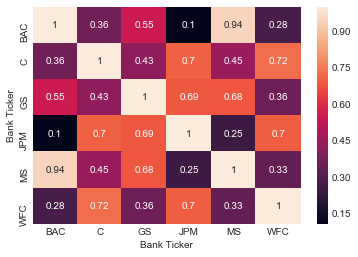

In [110]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot = True)

** Use seaborn's clustermap to cluster the correlations together:**

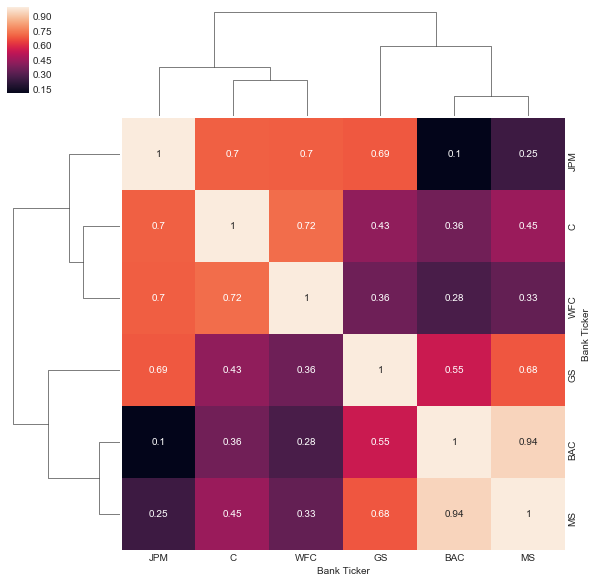

In [111]:
sns.clustermap(bank_stocks.xs(key='Close', 
                              axis=1, level='Stock Info').corr(), 
                              annot = True)

In [115]:
#Correlation Matrix
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Bank Ticker                                                            
BAC          1.000000  0.363303  0.550936  0.103855  0.944219  0.276687
C            0.363303  1.000000  0.426868  0.700735  0.449794  0.723474
GS           0.550936  0.426868  1.000000  0.685347  0.683830  0.359021
JPM          0.103855  0.700735  0.685347  1.000000  0.250410  0.697574
MS           0.944219  0.449794  0.683830  0.250410  1.000000  0.331510
WFC          0.276687  0.723474  0.359021  0.697574  0.331510  1.000000

In [116]:
#Using iplot()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

** Using cufflinks library to create  Technical Analysis plots. **

In [117]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
cf.go_offline

<function cufflinks.offline.go_offline>

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [118]:
BAC15 = BAC[['Open','High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01']
BAC15.head()

/Users/Jayashri/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



Open   High      Low  Close
Date                                     
2015-01-02  17.990  18.03  17.6801  17.90
2015-01-05  17.785  17.81  17.2900  17.38
2015-01-06  17.420  17.44  16.7800  16.86
2015-01-07  17.140  17.18  16.8700  16.94
2015-01-08  17.160  17.34  17.1000  17.29

In [119]:
BAC15.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [120]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma', 
                                                  periods =[13,21,55])

/Users/Jayashri/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [250]:
BAC['Close'].ix['2015-01-01': '2016-01-01'].ta_plot(study='boll')